## Assignment 1

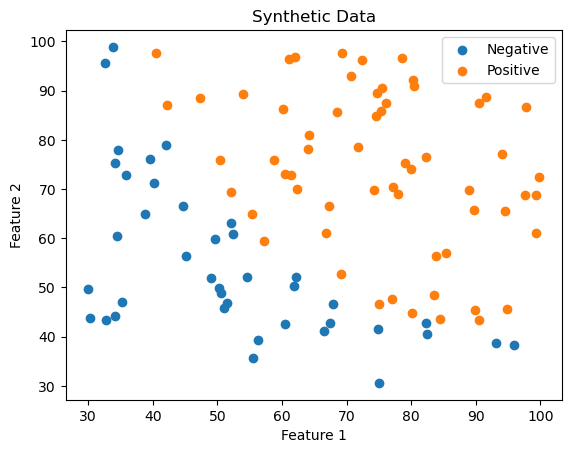

In [22]:

# Developing a Prediction Model with Linearly Separable Data Implement logistic regression as the classifier.
# Visualize the synthetic data by displaying a scatter plot of the ab3assign1traing.txt file.

import numpy as np
import matplotlib.pyplot as plt

# Load data
data = np.loadtxt("lab3 assign 1 training data.txt.txt", delimiter=',')

X = data[:, :2]  # Features
y = data[:, 2]   # Labels

# Visualize data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Negative')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Positive')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Synthetic Data')
plt.legend()
plt.show()


In [2]:
#a) Split the data set a training data set (80%) and Test data set (20%) to do cross validation.


from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


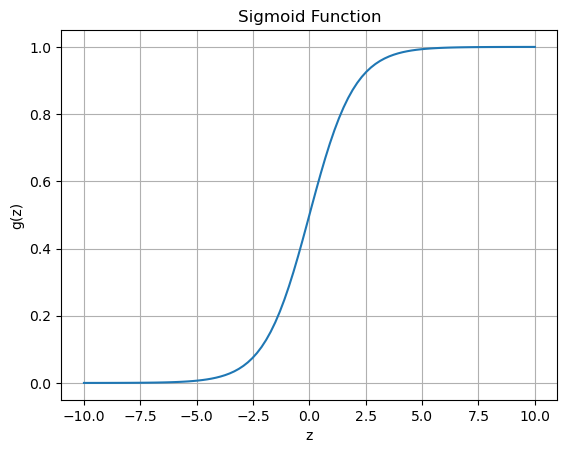

In [3]:

# tests the sigmoid function by plotting its output

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Test the sigmoid function
sample_z = np.linspace(-10, 10, 100)
sample_gz = sigmoid(sample_z)

plt.plot(sample_z, sample_gz)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.grid(True)
plt.show()


a) Employing the optimal parameters, generate a line of best separation lon the
   training data. Include the corresponding figure in your report.
b) Utilize the model to predict the outcomes of the test data in order to assess the
   classifier's efficacy.
c) Incorporate a figure illustrating the test data and the line of best separation in
   your report. Provide commentary on the obtained results

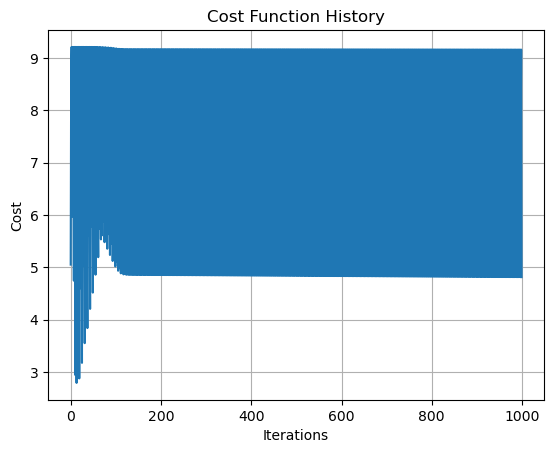

In [5]:
def initialize_parameters(dim):
    return np.zeros((dim, 1))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    epsilon = 1e-10  # Small epsilon value to avoid taking log of zero
    cost = (-1 / m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, theta, alpha, num_iters):
    m = len(y)
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta))
        gradient = (1 / m) * X.T.dot(h - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        J_history.append(cost)

    return theta, J_history

# Add intercept term to X
X_train_with_intercept = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# Initialize parameters
initial_theta = initialize_parameters(X_train_with_intercept.shape[1])

# Set hyperparameters
alpha = 0.01
num_iters = 1000

# Run gradient descent
theta, J_history = gradient_descent(X_train_with_intercept, y_train.reshape(-1, 1), initial_theta, alpha, num_iters)

# Visualize cost history
plt.plot(range(num_iters), J_history)
plt.title('Cost Function History')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


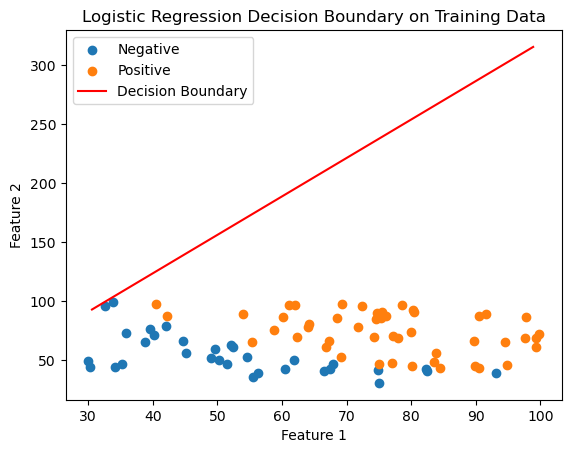

In [6]:
# Plot decision boundary
x1_values = [np.min(X_train[:, 1]), np.max(X_train[:, 1])]
x2_values = - (theta[0] + theta[1] * x1_values) / theta[2]

plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Negative')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Positive')
plt.plot(x1_values, x2_values, color='red', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary on Training Data')
plt.legend()
plt.show()


In [7]:
#Calculate the classification accuracy.

# Add intercept term to X_test
X_test_with_intercept = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Predict
predictions = sigmoid(X_test_with_intercept.dot(theta))

# Convert probabilities to binary predictions
binary_predictions = (predictions >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(binary_predictions == y_test.reshape(-1, 1))
print("Test Accuracy:", accuracy)


Test Accuracy: 0.6


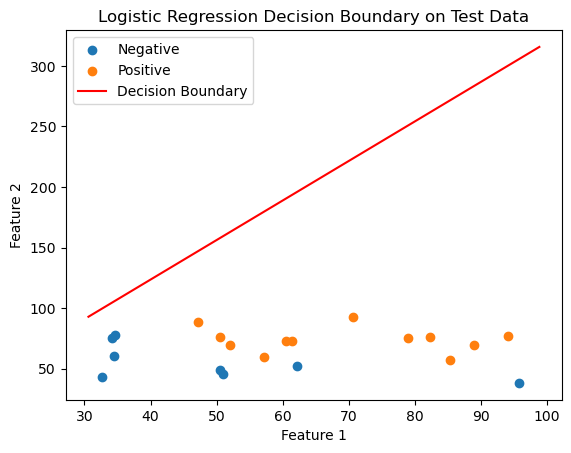

In [8]:
# Demonstrate the predictions for the new instances and visualize them through a plotted graph
# Plot decision boundary on test data
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], label='Negative')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], label='Positive')
plt.plot(x1_values, x2_values, color='red', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary on Test Data')
plt.legend()
plt.show()


## Assignment 2

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Load the dataset
data = pd.read_csv("Lab 3 assig 2 traing data.csv.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [16]:
print(data.columns)

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


Testing the classifier using the test dataset

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

Confusion Matrix:
[[50  2]
 [ 9 19]]


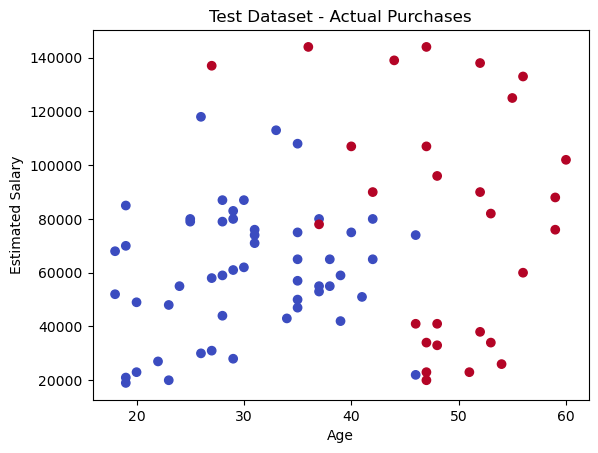

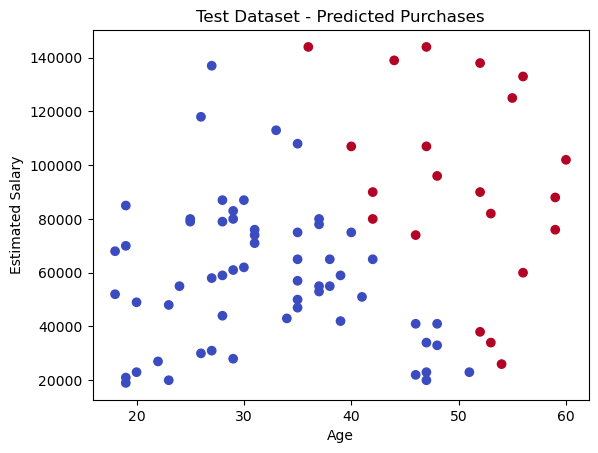

Model Coefficients:
        Age  EstimatedSalary
0  1.965217         1.135083


In [19]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Lab 3 assig 2 traing data.csv.csv")

# Data Preprocessing

# Convert categorical variable 'Gender' into numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

# Split data into features (X) and target (y)
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Model Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualization
plt.scatter(X_test['Age'], X_test['EstimatedSalary'], c=y_test, cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Test Dataset - Actual Purchases')
plt.show()

plt.scatter(X_test['Age'], X_test['EstimatedSalary'], c=y_pred, cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Test Dataset - Predicted Purchases')
plt.show()

# Insights and Recommendations
# Analyze the model's coefficients to understand the impact of age and salary on ad clicking behavior
coefficients = pd.DataFrame(model.coef_, columns=X.columns)
print("Model Coefficients:")
print(coefficients)



Prediction results for the instances:

Predicted Purchases for New Data:
[0 0 0 0 0 0 0 1 0 0 0 0]


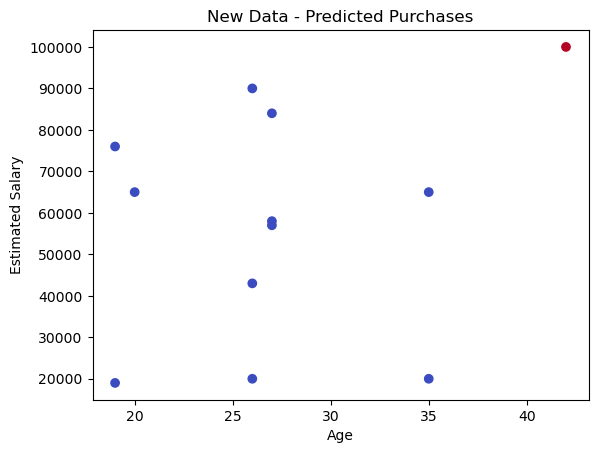

In [20]:
# Load the new dataset
new_data = pd.read_csv("Lab 3 assig 2 new data.csv")


# Assuming 'new_data' is the new dataset containing 'Age' and 'EstimatedSalary' columns
# Plug in the new data into the classifier to obtain predictions
new_data_scaled = scaler.transform(new_data[['Age', 'EstimatedSalary']])
new_predictions = model.predict(new_data_scaled)

# Observe the predicted results
print("Predicted Purchases for New Data:")
print(new_predictions)

# Present the results graphically
plt.scatter(new_data['Age'], new_data['EstimatedSalary'], c=new_predictions, cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('New Data - Predicted Purchases')
plt.show()


The model predicts that most of the instances (11 out of 12) will not result in purchases (predicted as 0).
Only one instance is predicted to result in a purchase (predicted as 1).